This is a simple pytorch to teach you how to use pytorch. Pytorch is widely used for deep learning and it supports automatically compute gradients of equations. 

Let see how pytorch works.

## 1. How to Autograd

Since pytorch can compute derivatives automatically, we show 2 examples of the autograd of pytorch.

### 1.1 Autograd from Scratch

In [2]:
# Import modules
import torch # pytorch core module
import torchvision # pytorch computer vision module
import torch.nn as nn # pytorch standard net module
import numpy as np
import torchvision.transforms as transforms # scaling function

Let us start with the first example, we compute the gradients of `y = w * x + b`

In [3]:
# Create tensors.
x = torch.tensor(1., requires_grad=True) # set requires_grad if compute 
w = torch.tensor(2., requires_grad=True) #                  derivatives
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


After you build the computation graph, you can compute gradients for any equation. In this example, we have y = w * x + b. Partial derivative of y with respect to x can be computed as `x.grad`

### 1.2 Autograd with nn.Linear

Actually `w * x + b` is a simple linear model. We use `nn.Linear` in this example to show how to create a linear model:

In [6]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[-0.3108, -0.2729, -0.5598],
        [-0.1254, -0.0949, -0.0153]], requires_grad=True)
b:  Parameter containing:
tensor([-0.1089, -0.1291], requires_grad=True)


**Remarks**: `w` and `b` are the weights of the linear model. They are intialized with random variables. 


Now we show how to use the linear model `w*b` to approximate `y`:

In [7]:
# Build loss function and optimizer.
criterion = nn.MSELoss() # Mean Square Error
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01) # Stocastic 
                                                    #Gradient Descend 

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

loss:  0.7807512283325195


**Remarks:** `MSELOSS()` is the loss function, Mean Square Error. `SDG` is the optimizer, Stocastic Gradient Descend. We use the loss function to compute the error between the predicted value of the linear model and ground truth.

Now we optimze the linear model to make its predicted value closed to `y` as much as possible. Let us do one-step optimization:

In [8]:
# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

dL/dw:  tensor([[-0.3451,  0.1039, -0.6926],
        [-0.5663,  0.1949, -0.7459]])
dL/db:  tensor([-0.4857, -0.4996])
loss after 1 step optimization:  0.7608612775802612


Let us do 10-step optimization:

In [9]:
for i in range(10):
    optimizer.step()

# Print out the loss after 10-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 10 step optimization: ', loss.item())

loss after 1 step optimization:  0.585281252861023


**Remarks:** Now you can find that the as the steps of optimization increases, the loss decreases. And that means the prediction is more accurate.

## 2.How to create torch tensor from numpy

Now we show how to create a tensor from numpy array:

In [14]:
# Create a numpy array.
x = np.array([[1, 2], [3, 4]])

# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)

# Convert the torch tensor to a numpy array.
z = y.numpy()

print(f'x: {x}')
print(f'y: {y}')
print(f'z: {z}')

x: [[1 2]
 [3 4]]
y: tensor([[1, 2],
        [3, 4]])
z: [[1 2]
 [3 4]]


## 3. How to Create Pipline for custom dataset

In [19]:
## install wget  (uncomment the line based on your local computer system)
!brew install wget # for mac
# !sudo apt-get install wget # for ubuntu

Error: 
  homebrew-core is a shallow clone.
To `brew update`, first run:
  git -C /usr/local/Homebrew/Library/Taps/homebrew/homebrew-core fetch --unshallow
This command may take a few minutes to run due to the large size of the repository.
This restriction has been made on GitHub's request because updating shallow
clones is an extremely expensive operation due to the tree layout and traffic of
Homebrew/homebrew-core and Homebrew/homebrew-cask. We don't do this for you
automatically to avoid repeatedly performing an expensive unshallow operation in
CI systems (which should instead be fixed to not use shallow clones). Sorry for
the inconvenience!
==> Downloading https://homebrew.bintray.com/bottles/wget-1.21.1.big_sur.bottle.
==> Downloading from https://d29vzk4ow07wi7.cloudfront.net/e6ea2a50b8196206f7072
######################################################################## 100.0%
==> Pouring wget-1.21.1.big_sur.bottle.tar.gz
🍺  /usr/local/Cellar/wget/1.21.1: 88 files, 4MB
==> `brew c

In [20]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

--2021-03-27 16:03:28--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-03-27 16:03:29--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [                <=> ]  33.20M  3.59MB/s    in 20s     

2021-03-27 16:03:50 (1.69 MB/s) - ‘MNIST.tar.gz’ saved [34813078]

x MNIST/
x MNIST/raw/
x MNIST/raw/train-labels-idx1-ubyte
x MNIST/raw/t10k-labels-idx1-ubyte.gz
x MNIST/raw/t10k-labels-idx1-ubyte
x MNIST/raw/t10k-images-idx3-ubyte.gz
x MNIST/raw/train-images-idx3-ubyte
x MNIST/raw/train-labels-idx1-ubyte.gz
x MNIST/raw/t10k-images-idx3-u

NameError: name 'num' is not defined

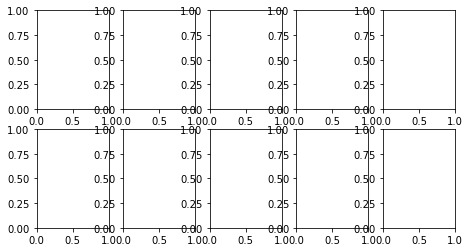

In [27]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline 


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./', 
                                           train=True, 
                                           transform=transforms.ToTensor())

test_dataset = torchvision.datasets.MNIST(root='./', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
for images, labels in train_loader:
    num_row = 2
    num_col = 5
    fig, axes = plt.subplots(num_row, num_col, 
                             figsize=(1.5*num_col,2*num_row))
    for i in range(num):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i][0], cmap='gray')
        ax.set_title('Label: {}'.format(labels[i]))
    plt.tight_layout()
    break